# Introduction to Probability

## Example problem

A large number of cards from many different decks is scattered on the street. How many cards would one need to look at before all 52 different cards from a deck are seen?


## Learning aims

- know basic concepts such as outcome, event, probability, probability distribution, experiment, and conditional probability
- list some probability distributions like binomial, uniform
- connect basic concepts to code that simulates random processes
- explore data through plotting and calculation of simple probabilities
- model simple toy problems, specifically using Bernoulli and binomial distributions, and write code that simulates such simple problems.

## A quick question before we start...

Link: https://www.menti.com/4ii97w7bfi

Code for menti.com: 3269 1977

## Example: a coin toss

In [3]:
import random
import numpy as np
from util import plot_event_probabilities, coin1, coin2

In [5]:
def coin():
    return random.sample(['head', 'tail'], 1)[0]

coin()

'tail'

## Example: rolling dice

In [6]:
# live-coded

def die():
    return random.sample([1, 2, 3, 4, 5, 6], 1)[0]

die()


6

## Probability

Probability of getting a head when tossing a coin:
  
if we toss a coin many times, how often we get head
  


In [7]:
n_throws = 100
throws = [coin() for _ in range(n_throws)]

print(f"Throws:\n{throws}\n")
print(f"How often we get head: {round(throws.count('head') / n_throws * 100)}% of time")
print(f"How often we get tail: {round(throws.count('tail') / n_throws * 100)}% of time")

Throws:
['head', 'head', 'head', 'tail', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'head', 'tail', 'tail', 'head', 'head', 'tail', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'tail', 'tail', 'tail', 'head', 'tail', 'tail', 'head', 'tail', 'head', 'tail', 'tail', 'tail', 'head', 'tail', 'tail', 'tail', 'tail', 'tail', 'head', 'head', 'tail', 'tail', 'tail', 'head', 'head', 'head', 'tail', 'head', 'head', 'tail', 'tail']

How often we get head: 46% of time
How often we get tail: 54% of time


In [8]:
throws = [coin2() for _ in range(n_throws)]

print(f"Throws:\n{throws}\n")
print(f"How often we get head: {round(throws.count('head') / n_throws * 100)}% of time")
print(f"How often we get tail: {round(throws.count('tail') / n_throws * 100)}% of time")

Throws:
['head', 'tail', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'tail', 'tail', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'tail', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'head', 'tail', 'head', 'head', 'head', 'head', 'head', 'tail']

How often we get head: 84% of time
How often we get tail: 16% of time


## Example: weighted coin

What happened with coin2?

In [10]:
import inspect
print(inspect.getsource(coin2))

def coin2():
    return random.sample(['head', 'head', 'head', 'head', 'tail'], 1)[0]



coin2 is such that it's four times as likely to get a head as it is to get a tail.

## Alternative implementation of coin function

Going back to the original coin, it could have been implemented this way:

In [11]:
def coin3():
    random_val_between_0_and_1 = random.random()
    print(random_val_between_0_and_1)
    return 'head' if random_val_between_0_and_1 < 0.5 else 'tail'

coin3()

0.7971084601319196


'tail'

### Exercise: weighted coin

Write a function to simulate a weighted coin with explicitly provided probability of getting a head.

In [35]:
def weighted_coin(p_head: float = 0.3):
    pass

weighted_coin()

'tail'

## Outcomes and experiments

If we toss a coin, two things can happen:

  - we can get a head, or
  - we can get a tail.

In this setting, head and tail are possible **outcomes** of tossing a coin.

Tossing a coin is then called an **experiment**.

More formally, an experiment is a random process that produces exactly one possible outcome.

## Sample space

A set of all possible outcomes is called a **sample space**.

For coin toss: sample space = {head, tail}

Elements of the sample space should be distinct and mutually exclusive --> unique outcome of an experiment

The sample space has to be collectively exhaustive: no matter the outcome of an experiment, the outcome has to be a part of the sample space

For coin toss: both head and tail need to be in the sample space

## Sample space

A set of **all possible outcomes** is called a **sample space**.

In [13]:
def coin():
    sample_space = ['head', 'tail'] # sample space with 2 possible outcomes
    outcome = random.sample(sample_space, 1)[0]
    return outcome

obtained_outcome = coin()

print(f"Outcome: {obtained_outcome}")
print(f"Valid outcome: {obtained_outcome in ['head', 'tail']}")

Outcome: tail
Valid outcome: True


## Example: multiple coin tosses 

If we toss a coin 3 times, what is the probability that we get exactly 2 heads?

What are the possible outcomes here?

In [37]:
def toss_coin_n_times(n):
    # live-coded:
    return tuple([coin() for _ in range(n)])

toss_coin_n_times(n=3)

('head', 'head', 'tail')

How can we now estimate the probabilities of events like getting exactly 2 heads? What would simulation look like?

## Event

An event A is a set of possible outcomes.

The probability of an event A, denoted P(A), describes the knowledge or belief about the collective "likelihood" of the elements in A.

Coin toss example:

Outcomes: H, T

Examples of events: {H}, {T}

## Event

Toss a coin 3 times:

Outcomes: HHH, HHT, HTH, HTT, THH, THT, TTH, TTT

Events: A = {exactly 2 heads occur} = {HHT, HTH, THH}

In [15]:
def estimate_probability_of_getting_2_heads_from_3_tosses(num_experiments: int):

    # live-coded
    
    got_2_heads_count = 0
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=3)
        got_2_heads_count += int(outcome.count('head') == 2)

    probability_of_2_heads = got_2_heads_count / num_experiments
    return probability_of_2_heads

estimate_probability_of_getting_2_heads_from_3_tosses(num_experiments=1000)

0.368

### Exercise: even number when rolling dice

Write a function that estimates the probability that after rolling a fair 6-sided die, the number that comes up is even. What is the random experiment here? What are the possible outcomes? What is the event in question and which outcomes correspond to this event?

In [ ]:
def estimate_even_number_prob() -> float:
    pass

## Probability distribution

A probability distribution gives the probability of the occurrence of different possible outcomes:

- If we toss a coin, what is the probability that we get a head: P(head), and what is the probability that we get a tail: P(tail)

- If we toss a coin 3 times, what is the probability that we get 0 heads: P(H0), 1 head: P(H1), 2 heads: P(H2), or 3 heads: P(H3)

Probability distribution is a mathematical function that connects non-overlapping events to the probabilities that sum to 1.

NB: A discrete probability distribution can be seen as a **dictionary** in Python, where the non-overlapping events are keys and the probabilities corresponding to the events are values. A discrete probability distribution does not correspond to a Python function.

In [41]:
from itertools import product

def estimate_probability_distribution(n_tosses, num_experiments):

    # live-coded:
    all_possible_outcomes = list(product(['head', 'tail'], repeat=n_tosses))
    print(f"Outcomes:\n{all_possible_outcomes}\n")

    events = list(range(n_tosses+1))
    print(f"Events:\n{events}\n")

    event_counts = {event: 0 for event in events}

    for experiment in range(num_experiments):
        outcome = toss_coin_n_times(n=n_tosses)
        event = outcome.count('head')
        event_counts[event] += 1

    prob_dist = {event: count / num_experiments for event, count in event_counts.items()}
    
    return prob_dist

prob_dist = estimate_probability_distribution(n_tosses=3, num_experiments=100)

print(f"Probability distribution: {prob_dist}")

Outcomes:
[('head', 'head', 'head'), ('head', 'head', 'tail'), ('head', 'tail', 'head'), ('head', 'tail', 'tail'), ('tail', 'head', 'head'), ('tail', 'head', 'tail'), ('tail', 'tail', 'head'), ('tail', 'tail', 'tail')]

Events:
[0, 1, 2, 3]

Probability distribution: {0: 0.14, 1: 0.44, 2: 0.33, 3: 0.09}


This way of obtaining probability distributions through simulations is called Monte Carlo simulation.

We can also show the results of the simulation graphically:

Outcomes:
[('head', 'head', 'head'), ('head', 'head', 'tail'), ('head', 'tail', 'head'), ('head', 'tail', 'tail'), ('tail', 'head', 'head'), ('tail', 'head', 'tail'), ('tail', 'tail', 'head'), ('tail', 'tail', 'tail')]

Events:
[0, 1, 2, 3]



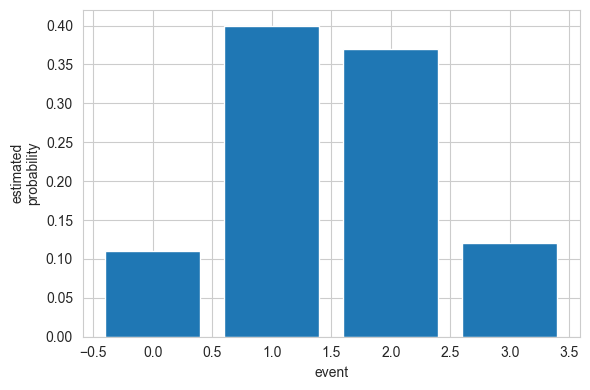

In [42]:
n = 3
num_experiments = 100

prob_dist = estimate_probability_distribution(n, num_experiments)

plot_event_probabilities(prob_dist)

### Exercise: the probability of obtaining at least 1 head

What is the probability of obtaining at least 1 head from 3 tosses? Write the code to estimate it.

In [18]:
def estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments: int):
  pass

estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments=1000)

0.528

## Example: probability of at least 1, 2 and 3 heads

Now write the code to estimate the probability of getting at least 1 head, at least 2 heads, and at least 3 heads.

In [19]:
# live-coded:

def estimate_probability_of_at_least_m_heads(num_experiments: int):
    toss_count = 3
    got_at_least_n_heads_counts = {i: 0 for i in range(toss_count+1)}
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=toss_count)
        head_count = outcome.count('head')
        for at_least_n in got_at_least_n_heads_counts.keys():
            if at_least_n >= head_count:
                got_at_least_n_heads_counts[at_least_n] += 1

    probabilities = {at_least_n: count / num_experiments for at_least_n, count in got_at_least_n_heads_counts.items()}
    return probabilities

print(estimate_probability_of_at_least_m_heads(num_experiments=1000))

{0: 0.128, 1: 0.483, 2: 0.874, 3: 1.0}


One example output of the previous function: {0: 0.111, 1: 0.491, 2: 0.877, 3: 1.0} - **this is not a valid probability distribution!**

Why?

## Outcome vs event

"At least n heads" is an **event** - it contains several outcomes: (head, tail, head) and (head, tail, tail) are two different outcomes, but the same event of "at least 1 head".

"At least n heads" **cannot be an outcome** if we want to estimate the probability of at least n heads for n=1,2,3, because it is not exclusive: outcome (head, tail, head) belongs to both "at least 1" and "at least 2" heads events.

## Outcome vs event

Outcomes and events are two levels of abstraction used to describe a random process.

Outcomes are elementary and enumerate all the different possibilities. Probabilities of all outcomes sum to 1, as one outcome has to occur as a result of an experiment.

Events are defined as sets of outcomes that are of interest. Probabilities of events are the sum of probabilities of all outcomes that are part of the event.

## Probability axioms

Probability axioms hold for any probability by definition:

- Probability of any event A is always nonnegative:
  P(A) >= 0
- For two events A and B that do not overlap (disjoint events), the probability of both happening is the sum of their individual probabilities:
  P(A U B) = P(A) + P(B)
- The probability of the entire sample space (of all possible outcomes) is equal to 1.

## Going back to the betting example

If we throw a fair coin 10 times, what is the probability that we get 5 heads and 5 tails? Write the code to simulate this experiment and empirically estimate its probability.

Some thinking points:
- What is the event in this case?
- What are possible outcomes?

Write the code here and estimate the probability of obtaining exactly 5 heads and 5 tails in 10 coin tosses:


In [ ]:
event_probs = estimate_probability_distribution(n_tosses=10, num_experiments=10000)

print("Probabilities of different events:")
print(event_probs)

print(event_probs[5])

## Back to Menti

Link: https://www.menti.com/4ii97w7bfi

Code for menti.com: 3269 1977

## Empirical and analytical solutions

Through simulations, we can estimate the probability of an event.

We can also often mathematically describe the probability distribution and compute it using a formula.

However, in some cases, we either do not know the formula or the distribution would be too hard to compute, then we go back to (Monte Carlo) simulations.

## Empirical and analytical solutions

**Probability mass function**: a function that gives the probability of an outcome or an event (e.g., the probability of getting 2 heads in 3 coin tosses).

Some random processes occur in many different situations. For example, we can toss a coin to get a head/tail, a student can take an exam where they pass/fail, or a diagnostic test that results in a positive/negative diagnosis - all of these have a specific "type of randomness".

## Bernoulli distribution

This distribution models any yes/no (1/0) question where yes (1) is chosen with probability p.

Example: a coin toss comes up with a head with probability p and a tail with probability 1-p.

<div>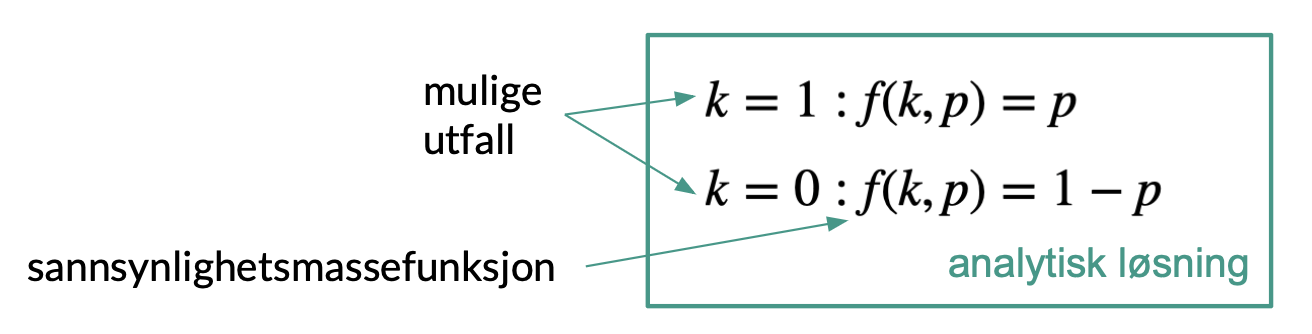</div>

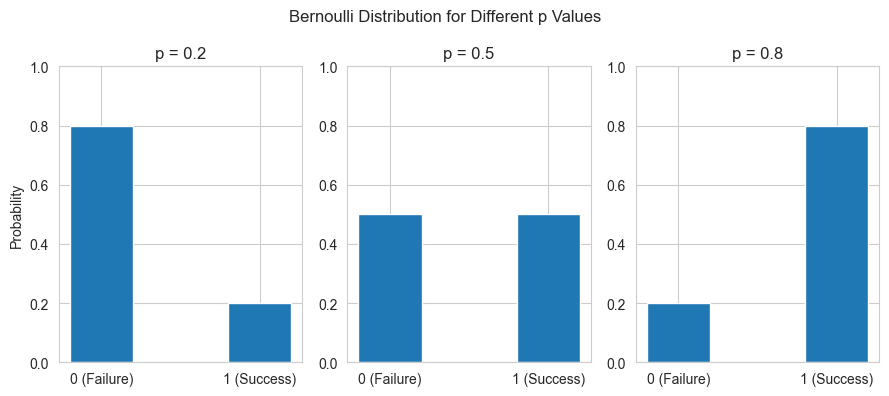

In [21]:
from util import plot_bernoulli_examples

plot_bernoulli_examples()

## Binomial distribution

Binomial distribution describes the number of successes *k* (e.g., getting heads) in a sequence of n trials (e.g., in *n* coin throws) where the probability of success in each trial is *p*.

The probability of getting *k* successes in *n* independent trials if the probability of success is *p* can be computed using the following probability mass function:

<div>
    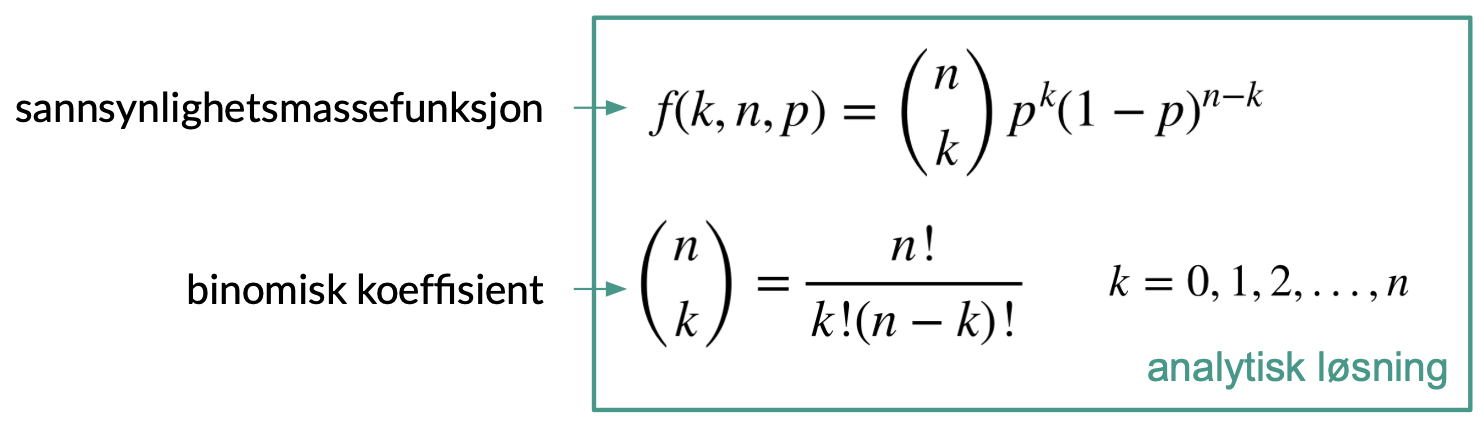
</div>

In [22]:
# What is the probability of getting exactly one head in three tosses of a fair coin?

n = 3 # number of trials (tosses)
k = 1 # number of successes (heads)
p = 0.5 # probability of success in one trial for a fair coin

# computing the formula:

import math

prob_one_head_from_formula = round(math.factorial(n) // (math.factorial(k) * math.factorial(n-k)) * p**1 * (1-p)**2, 3)

from scipy.stats import binom

prob_one_head_from_library = round(binom.pmf(k, n, p), 3)

print(f"From manually computing the formula: {prob_one_head_from_formula}")
print(f"Using implementation from scipy library: {prob_one_head_from_library}")

From manually computing the formula: 0.375
Using implementation from scipy library: 0.375


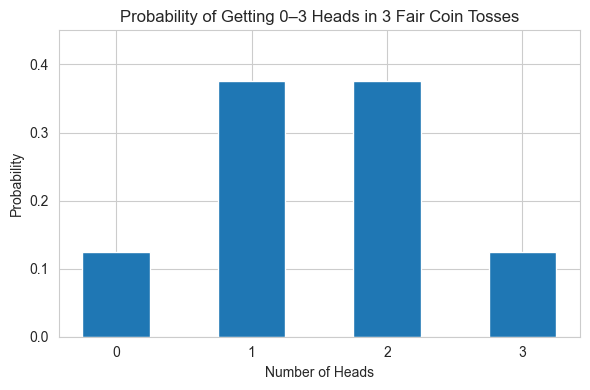

In [23]:
from util import plot_binomial_distribution_example

plot_binomial_distribution_example()

# Empirical estimates vs analytic probabilities

Previously, we simulated tossing a coin 3 times to get the probability of getting different numbers of heads. Here is an example implementation that estimates the probabilities of these 4 events.

In [44]:
def toss_coin_n_times(p_head: float, n: int):
    return ['H' if random.random() <= p_head else 'T' for _ in range(n)]

def simulate_event_probabilities(p_head: float, n: int, num_experiments: int):
    event_counts = {i: 0 for i in range(n+1)}
    
    for experiment in range(num_experiments):
        outcome = toss_coin_n_times(p_head, n)
        event_counts[outcome.count('H')] += 1
        
    prob_dist = {f'H{event}': count / num_experiments for event, count in event_counts.items()}
    
    return prob_dist

event_probabilities_simulation = simulate_event_probabilities(p_head=0.5, n=3, num_experiments=100)
print(event_probabilities_simulation)

{'H0': 0.18, 'H1': 0.32, 'H2': 0.42, 'H3': 0.08}


This can also be computed using a formula of binomial distribution (probability of getting *k* successes in *n* independent trials when the probability of success is *p*):

In [45]:
import math

def head_count_prob(p_head, n, head_count):
    return math.factorial(n) / (math.factorial(head_count) * math.factorial(n - head_count)) * (p_head**head_count) * ((1-p_head)**(n-head_count))

event_probabilities_from_formula = {
    f'H{head_count}': head_count_prob(p_head=0.5, n=3, head_count=head_count) for head_count in range(4)
}

print(event_probabilities_from_formula)

{'H0': 0.125, 'H1': 0.375, 'H2': 0.375, 'H3': 0.125}


We can also show the empirically estimated probabilities side by side with the ones we computed analytically:

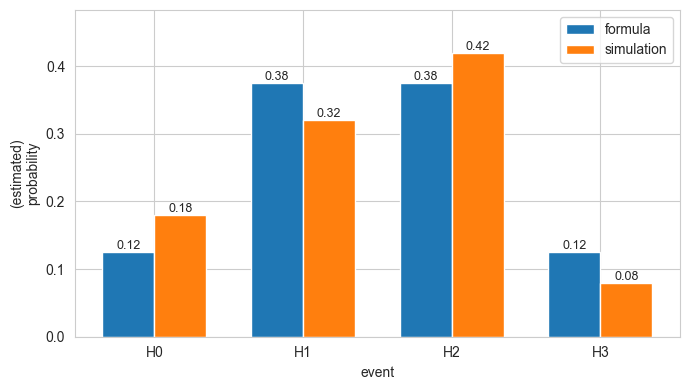

In [47]:
from util import plot_probability_comparison

plot_probability_comparison(event_probabilities_simulation, event_probabilities_from_formula)

## Categorical distributions

When rolling a die once, there are 6 equally likely possible outcomes: k=6, with probabilities of each p=1/6.

Categorical distribution: generalization of the Bernoulli distribution with k possible categories, with probability for each category defined separately.

<div>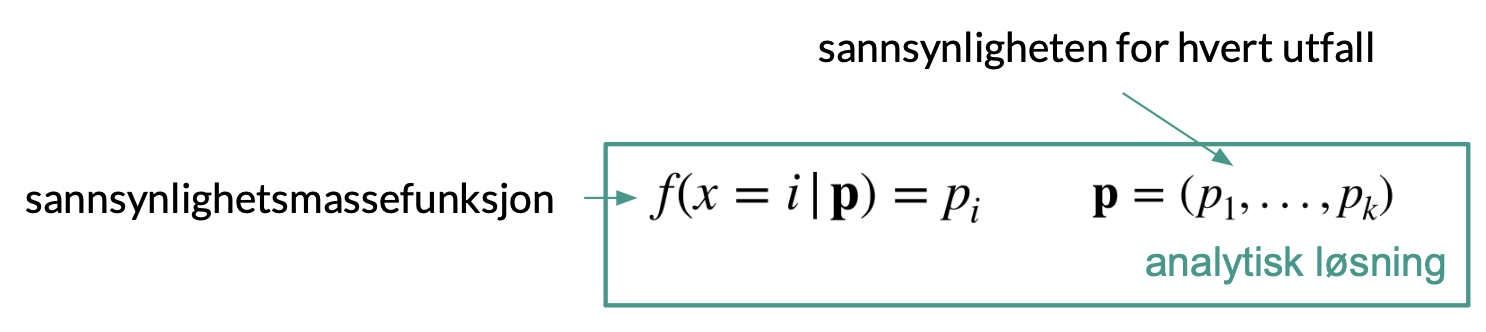</div>

## Multinomial distribution

The multinomial distribution models the probability of obtaining each side of a die when rolling it n times.

In each of n trials, we obtain exactly one of the k categories with fixed probability for that category.

Trials are independent.

## Uniform distribution

If we roll a fair die, we expect all the sides to be obtained equally often -> each side has the same probability.

In a uniform distribution, all outcomes are equally likely.

<div>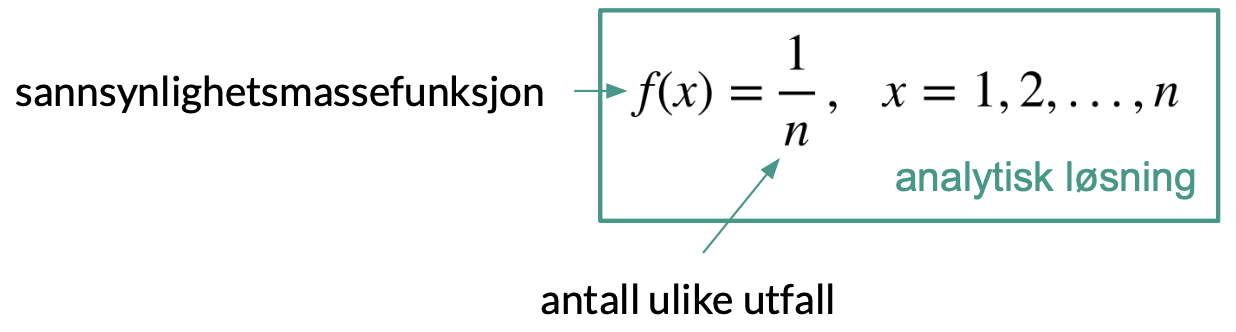</div>

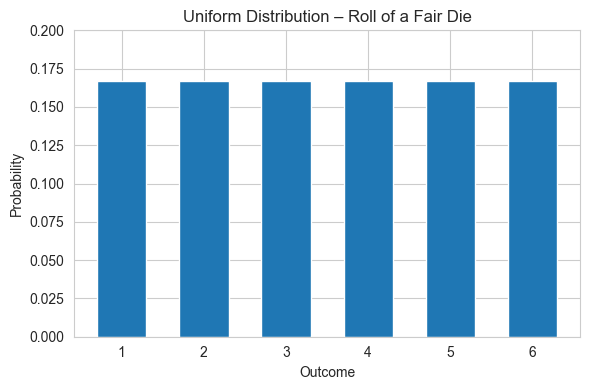

In [29]:
from util import plot_uniform_die

plot_uniform_die()

## What happens if we toss a coin many times: approaching continuous distributions


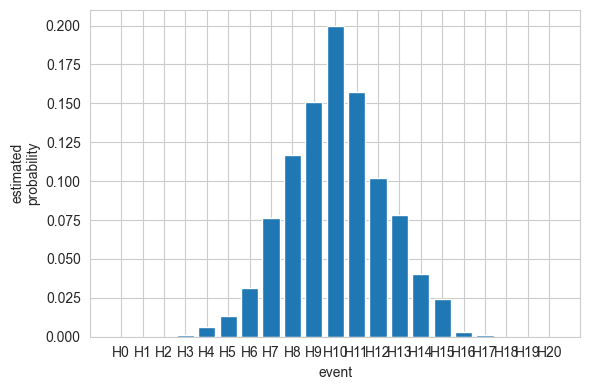

In [30]:
p_head, n, num_experiments = 0.5, 20, 1000
event_probabilities_sim = simulate_event_probabilities(p_head, n, num_experiments)
plot_event_probabilities(event_probabilities_sim)

### Exercise: Monopoly


In the game of Monopoly, one moves one's marker around a board containing 40 fields, by throwing a pair of dice every turn. What is the probability of finishing your first round on your fifth turn?

<img src="https://images.unsplash.com/photo-1640461470346-c8b56497850a?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1674&q=80" style="height:280px; float: left; margin-top: 10px; margin-right: 10px" />

Alternatively:

What is the probability that the sum of values passes 40 after drawing a sample from a pair of (2) randint(1,6) calls exactly 5 times?


Write a code to simulate this and estimate the probability.


In [32]:
def estimate_monopoly_probability(num_experiments: int = 1000) -> float:
  pass

estimate_monopoly_probability()

0.166

## General procedure for simulation

1. *Problem-specific*: write code to simulate the desired experiment
2. *Generic*: to simulate many times, use Monte Carlo (MC) with a for loop
3. *Generic*: Count successes - how many times the event occurs (across the MC loop)
4. *Generic*: Calculate probability as number of successes divided by the number of MC iterations

To instead compute a full probability distribution:

- Step 3: count instead how many times each different outcome/event occurs
- Step 4: divide the counts of each outcome/event by the number of MC iterations to get the probability for each event

## Conditional probability

Conditional probability: a way to reason about the outcome of an experiment based on partial information

We know that the outcome is within some event B - we want to quantify the likelihood that the outcome also belongs to some other event A

<div>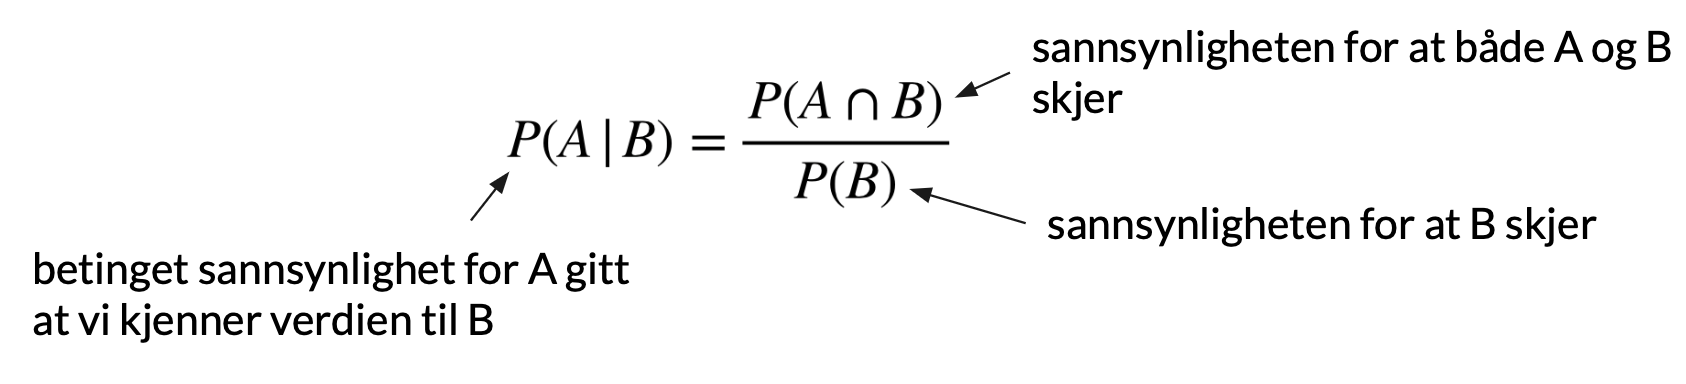</div>

## Computing the probability of a letter in a text


In [33]:
import re

original_text = """To be, or not to be, that is the question, Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune,Or to take arms against a sea of troubles,And by opposing end them? To die: to sleep;No more; and by a sleep to say we endThe heart-ache and the thousand natural shocksThat flesh is heir to, 'tis a consummationDevoutly to be wish'd. To die, to sleep;To sleep: perchance to dream: ay, there's the rub;For in that sleep of death what dreams may comeWhen we have shuffled off this mortal coil,Must give us pause: there's the respectThat makes calamity of so long life;For who would bear the whips and scorns of time,The oppressor's wrong, the proud man's contumely,The pangs of despised love, the law's delay,The insolence of office and the spurnsThat patient merit of the unworthy takes,When he himself might his quietus makeWith a bare bodkin? who would fardels bear,To grunt and sweat under a weary life,But that the dread of something after death,The undiscover'd country from whose bournNo traveller returns, puzzles the willAnd makes us rather bear those ills we haveThan fly to others that we know not of?Thus conscience does make cowards of us all;And thus the native hue of resolutionIs sicklied o'er with the pale cast of thought,And enterprises of great pith and momentWith this regard their currents turn awry,And lose the name of action.--Soft you now!The fair Ophelia! Nymph, in thy orisonsBe all my sins remember'd."""
text = re.sub(r"[\.\,\:\' \;\n\-\?\!]*", "", original_text).lower()

# print(original_text)
# print(text)

def compute_marginal_probability(letter, text):

    # live-coded
    count = text.count(letter)
    probability = round(count / len(text), 3)
        
    return probability

def compute_conditional_probability(letter, previous_letter, text):

    # live-coded
    count_previous_letter = text.count(previous_letter)
    count_both_letters = text.count(previous_letter + letter)

    cond_probability = round(count_both_letters / count_previous_letter, 3)
        
    return cond_probability

print(compute_marginal_probability("a", text))

print(compute_conditional_probability("a", "h", text))

0.075
0.177


### Exercise: More heads than tails in fair coin tosses

We toss a fair coin 3 times. What is the probability that more heads than tails come up if the first toss is head?

In [34]:
|def estimate_more_heads_probability(num_experiments):
  pass

estimate_more_heads_probability(1000)


0.761

## Problem from the beginning

"A large number of cards from many different decks is scattered on the street. How many cards would one need to look at before all 52 different cards from a deck are seen?"

- How would you solve this problem now?
- How to frame this problem in the light of probability theory?


### Exercise: sum of sides when rolling dice

You are rolling a die three times. What is the probability that the sum of the sides is less than 12?

In [24]:
def estimate_probability_of_sum(target_sum, num_experiments):
    pass

estimate_probability_of_sum(12, 100)

{'less_than_target': 0.73, 'greater_equal_target': 0.27}

### Exercise: series of card matches

Three card players play a series of matches. The probability that player 1 will win any game is 30%, the probability that player 2 will win is 50% and the probability that the third player wins is 20%. If they play 6 games, what is the probability that player 1 wins at least 2 games?


In [25]:
def estimate_winner_probability(player1_p, player2_p, player3_p, num_games, num_experiments):
    pass

estimate_winner_probability(0.3, 0.5, 0.2, 6, 10000)


{'player1wins2+': 0.5848, 'player1wins1-': 0.4152}

# Solutions for the exercises

### Exercise: weighted coin

In [ ]:
def weighted_coin(p_head: float = 0.3) -> str:
    outcome = 'head' if random.random() < p_head else 'tail'
    return outcome

weighted_coin()

### Exercise: even number when rolling dice

In [49]:
def die():
    return random.choice(list(range(1, 7)))

def estimate_even_number_prob(num_experiments: int = 1000) -> float:
    even_number_happened = 0

    for _ in range(num_experiments):
        outcome = die() # specific number that came up
        even_number_happened += int(outcome % 2 == 0) # count another event if the number is even

    return even_number_happened / num_experiments

estimate_even_number_prob()

0.489

### Exercise: the probability of obtaining at least 1 head

In [ ]:
def estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments: int):
    got_at_least_1_head_count = 0
    for _ in range(num_experiments):
        outcome = toss_coin_n_times(n=3)
        got_at_least_1_head_count += int(outcome.count('head') >= 2)

    probability_of_at_least_1_head = got_at_least_1_head_count / num_experiments
    return probability_of_at_least_1_head

estimate_probability_of_getting_at_least_1_head_from_3_tosses(num_experiments=1000)

### Exercise: Monopoly

In [ ]:
def estimate_monopoly_probability(num_experiments: int) -> float:
    successes = 0

    for experiment in range(num_experiments):
        outcome = [[die() for _ in range(2)] for _ in range(5)]
        value = sum(sum(dice) for dice in outcome)
        if value > 40:
            successes += 1

    return successes / num_experiments

estimate_monopoly_probability(1000)

## Exercise: More heads than tails in fair coin tosses

In [ ]:
def estimate_more_heads_probability(num_experiments: int) -> float:

    more_heads_total = 0
    head_first = 0

    for experiment in range(num_experiments):
        outcome = [coin() for _ in range(3)]
        if outcome[0] == 'head':
            head_first += 1
            if outcome.count('head') > outcome.count('tail'):
                more_heads_total += 1
    return round(more_heads_total / head_first, 3)


estimate_more_heads_probability(1000)


## Exercise: sum of sides when rolling dice

In [ ]:
def estimate_probability_of_sum(target_sum, num_experiments):

    events = ['less_than_target', 'greater_equal_target']
    prob_dist = {event: 0 for event in events}
    for experiment in range(num_experiments):
        outcome = [die() for _ in range(3)]
        if sum(outcome) < target_sum:
            prob_dist['less_than_target'] += 1
        else:
            prob_dist['greater_equal_target'] += 1

    prob_dist = {event: count / num_experiments for event, count in prob_dist.items()}

    return prob_dist

estimate_probability_of_sum(12, 100)

## Exercise: series of card matches

In [ ]:
def estimate_winner_probability(player1_p, player2_p, player3_p, num_games, num_experiments):

    events = ['player1wins2+', 'player1wins1-']
    prob_dist = {event: 0 for event in events}

    for experiment in range(num_experiments):
        player1_wins = 0
        for game in range(num_games):
            player1_wins += random.random() < player1_p

        if player1_wins >= 2:
            prob_dist['player1wins2+'] += 1
        else:
            prob_dist['player1wins1-'] += 1

    prob_dist = {event: count / num_experiments for event, count in prob_dist.items()}

    return prob_dist


estimate_winner_probability(0.3, 0.5, 0.2, 6, 10000)
